# Simple ML Project: Iris Dataset Classification

This notebook demonstrates a simple classification model on the famous Iris dataset.

We will:
- Load data
- Explore data
- Visualize data
- Train a simple model
- Evaluate model
- Document the process


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## Load Data

We will load the Iris dataset from sklearn.datasets.


In [52]:
# Load Iris dataset
iris = load_iris()

# Create a DataFrame with features and target
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization

Let's visualize the relationships between features using scatter plots.


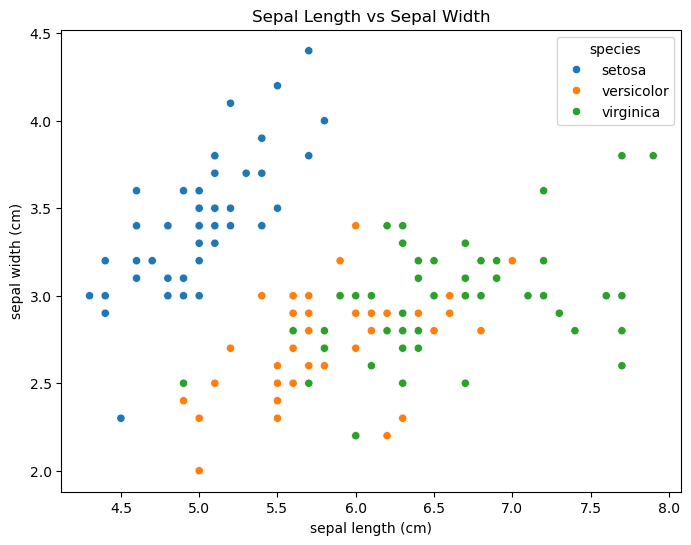

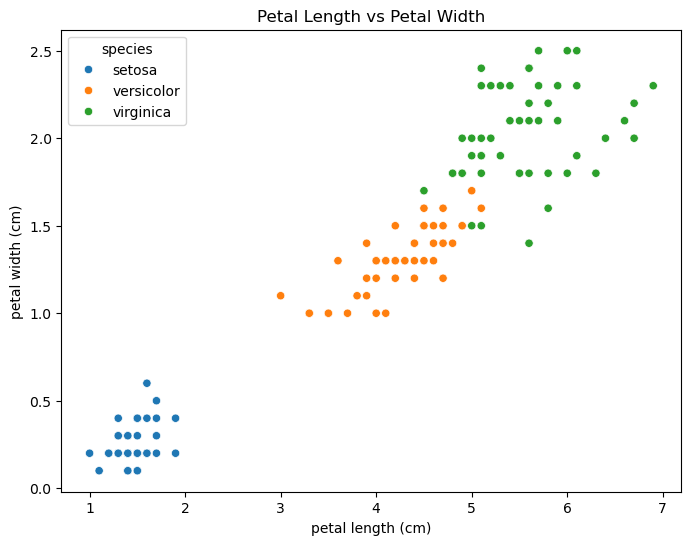

In [53]:
import seaborn as sns

# Map target numbers to species names for better clarity
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Plot Petal Length vs Petal Width
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal Length vs Petal Width')
plt.show()


## Data Preparation and Modeling

We will split the data into training and testing sets, scale features, train a Logistic Regression model, and evaluate it.


In [54]:
# Split features and target
X = df[iris.feature_names]
y = df['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Confusion Matrix Visualization

Let's plot the confusion matrix for better understanding of the model's performance.


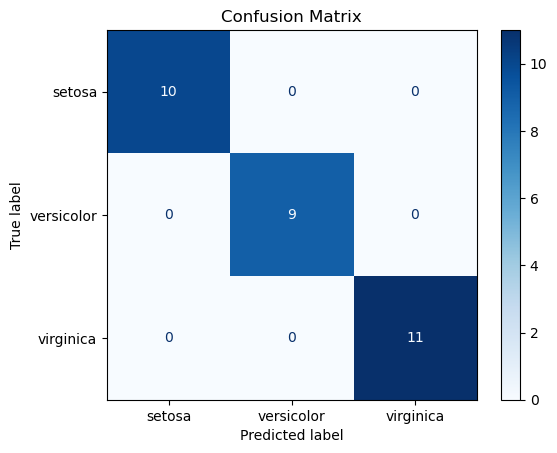

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                       display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../confusion_matrix.jpg')  # Saves to project root
plt.show()

## Summary

- Loaded Iris dataset and explored features.
- Visualized relationships between flower measurements.
- Trained a Logistic Regression classifier achieving 100% accuracy on test data.
- Visualized confusion matrix confirming perfect classification.

---

Next steps:
- Experiment with other models and datasets.
- Add cross-validation for robust evaluation.
- Version control your notebooks with Git/GitHub.
